<a href="https://colab.research.google.com/github/mralamdari/NLP-Text-Processing/blob/main/NLP_Text_Representation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [181]:
import spacy
import nltk
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn import manifold

warnings.filterwarnings('ignore')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
documents = ["Dog bites man.", "Man bites dog.", "Dog eats meat.", "Man eats food."]
documents = [sentence.lower().replace('.', '') for sentence in documents]
documents

['dog bites man', 'man bites dog', 'dog eats meat', 'man eats food']

###One-Hot Encoding

In [57]:
#Vocabulary
all_words = []
for sentence in documents:
  all_words.extend(sentence.split())

unique_words = set(all_words)
vocab = dict(zip(unique_words, range(len(unique_words))))
vocab

{'bites': 0, 'dog': 2, 'eats': 5, 'food': 1, 'man': 3, 'meat': 4}

In [58]:
#onehot creator
def onehot_creator(sentence):
  sentence = sentence.lower().split()
  onehot_encoded = np.zeros((len(sentence), len(vocab)))
  for i, word in enumerate(sentence):
    word_id = vocab.get(word)
    if word_id != None:
      onehot_encoded[i][word_id] = 1
  return onehot_encoded

In [59]:
onehot_creator("Dog bites man")

array([[0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.]])

In [60]:
test_sample = "Dog bites man and then eates meat"
onehot_creator(test_sample)

array([[0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.]])

One Hot Encoding with Scikit-learn

In [61]:
from sklearn import preprocessing

In [62]:
label_encoder = preprocessing.LabelEncoder()
onehot_encoder = preprocessing.OneHotEncoder()

In [63]:
label_encoder.fit_transform(all_words)

array([1, 0, 4, 4, 0, 1, 1, 2, 5, 4, 2, 3])

In [64]:
onehot_encoder.fit_transform(np.array(all_words).reshape(-1, 1)).toarray()

array([[0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.]])

###Bag of Words (BoW)

In [65]:
from sklearn import feature_extraction

In [66]:
count_vect = feature_extraction.text.CountVectorizer()

In [67]:
bow_representation = count_vect.fit_transform(documents)

In [68]:
count_vect.vocabulary_

{'bites': 0, 'dog': 1, 'eats': 2, 'food': 3, 'man': 4, 'meat': 5}

In [69]:
for rep in bow_representation:
  print(rep.toarray())

[[1 1 0 0 1 0]]
[[1 1 0 0 1 0]]
[[0 1 1 0 0 1]]
[[0 0 1 1 1 0]]


In [70]:
count_vect.transform([test_sample]).toarray()

array([[1, 1, 0, 0, 1, 1]])

BoW with Binary vectors

In [71]:
binary_count_vector = feature_extraction.text.CountVectorizer(binary=True)
binary_count_vector.fit(documents)

CountVectorizer(binary=True)

In [72]:
binary_count_vector.transform([test_sample]).toarray()

array([[1, 1, 0, 0, 1, 1]])

###Bag of N-Grams (BoN)

In [73]:
count_vect = feature_extraction.text.CountVectorizer(ngram_range=(1, 3))

In [74]:
bon_representation = count_vect.fit_transform(documents)

In [75]:
count_vect.vocabulary_

{'bites': 0,
 'bites dog': 1,
 'bites man': 2,
 'dog': 3,
 'dog bites': 4,
 'dog bites man': 5,
 'dog eats': 6,
 'dog eats meat': 7,
 'eats': 8,
 'eats food': 9,
 'eats meat': 10,
 'food': 11,
 'man': 12,
 'man bites': 13,
 'man bites dog': 14,
 'man eats': 15,
 'man eats food': 16,
 'meat': 17}

In [76]:
for rep in bow_representation:
  print(rep.toarray())

[[1 1 0 0 1 0]]
[[1 1 0 0 1 0]]
[[0 1 1 0 0 1]]
[[0 0 1 1 1 0]]


In [77]:
count_vect.transform([test_sample]).toarray()

array([[1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1]])

###TF-IDF

In [78]:
tfidf = feature_extraction.text.TfidfVectorizer()

In [79]:
bow_rep_tfidf = tfidf.fit_transform(documents)

In [80]:
bow_rep_tfidf.toarray()

array([[0.65782931, 0.53256952, 0.        , 0.        , 0.53256952,
        0.        ],
       [0.65782931, 0.53256952, 0.        , 0.        , 0.53256952,
        0.        ],
       [0.        , 0.44809973, 0.55349232, 0.        , 0.        ,
        0.70203482],
       [0.        , 0.        , 0.55349232, 0.70203482, 0.44809973,
        0.        ]])

In [81]:
#Idf for Vocabulary Words
tfidf.idf_

array([1.51082562, 1.22314355, 1.51082562, 1.91629073, 1.22314355,
       1.91629073])

In [82]:
#Vocabulary Words
tfidf.get_feature_names()

['bites', 'dog', 'eats', 'food', 'man', 'meat']

In [83]:
tfidf.transform([test_sample]).toarray()

array([[0.5051001 , 0.40892206, 0.        , 0.        , 0.40892206,
        0.64065543]])

###Word2Vec

####Embeddings using Spacy

In [ ]:
!python -m spacy download en_core_web_md

In [31]:
import spacy

In [32]:
nlp = spacy.load('en_core_web_md')

In [33]:
doc = nlp('i love pizza')

In [95]:
doc.vector

array([ 1.11230902e-01,  2.41379991e-01, -1.61966667e-01, -3.14129978e-01,
        1.05768003e-01,  3.91543359e-01,  3.54509979e-01, -1.27896652e-01,
        1.70420006e-01,  1.69123328e+00, -6.31393373e-01,  1.69920668e-01,
        7.96566680e-02, -1.29133360e-02, -1.50936663e-01,  1.39993383e-02,
       -1.84084341e-01,  1.19740999e+00, -2.22010016e-01,  2.34284341e-01,
        2.44166657e-01, -3.25873703e-01,  2.53593326e-01, -1.86454996e-01,
        1.27480000e-01,  4.88123260e-02, -3.57987314e-01, -2.18866989e-01,
        2.98794001e-01, -2.83073336e-02, -1.92849990e-02,  2.78633356e-01,
       -1.75589994e-01,  1.30146667e-01,  9.73366722e-02,  1.38193667e-01,
       -2.25796700e-02, -1.12435341e-01, -3.15516651e-01,  2.65180707e-01,
       -1.24165334e-01,  1.74489990e-01,  1.08916335e-01,  9.63599980e-02,
        2.16483325e-02,  5.32136679e-01, -2.61241674e-01,  2.68553346e-01,
        6.79000234e-03, -9.15016606e-02, -2.10650012e-01, -4.78706658e-02,
        1.10848665e-01, -

In [96]:
doc[0].vector

array([ 1.8733e-01,  4.0595e-01, -5.1174e-01, -5.5482e-01,  3.9716e-02,
        1.2887e-01,  4.5137e-01, -5.9149e-01,  1.5591e-01,  1.5137e+00,
       -8.7020e-01,  5.0672e-02,  1.5211e-01, -1.9183e-01,  1.1181e-01,
        1.2131e-01, -2.7212e-01,  1.6203e+00, -2.4884e-01,  1.4060e-01,
        3.3099e-01, -1.8061e-02,  1.5244e-01, -2.6943e-01, -2.7833e-01,
       -5.2123e-02, -4.8149e-01, -5.1839e-01,  8.6262e-02,  3.0818e-02,
       -2.1253e-01, -1.1378e-01, -2.2384e-01,  1.8262e-01, -3.4541e-01,
        8.2611e-02,  1.0024e-01, -7.9550e-02, -8.1721e-01,  6.5621e-03,
        8.0134e-02, -3.9976e-01, -6.3131e-02,  3.2260e-01, -3.1625e-02,
        4.3056e-01, -2.7270e-01, -7.6020e-02,  1.0293e-01, -8.8653e-02,
       -2.9087e-01, -4.7214e-02,  4.6036e-02, -1.7788e-02,  6.4990e-02,
        8.8451e-02, -3.1574e-01, -5.8522e-01,  2.2295e-01, -5.2785e-02,
       -5.5981e-01, -3.9580e-01, -7.9849e-02, -1.0933e-02, -4.1722e-02,
       -5.5576e-01,  8.8707e-02,  1.3710e-01, -2.9873e-03, -2.62

####Embeddings using Gensim

In [97]:
import gensim
corpus = [['dog','bites','man'], ["man", "bites" ,"dog"],["dog","eats","meat"],["man", "eats","food"]]

#####Continuous Bag of Words (CBOW)


In [98]:
model_cbow = gensim.models.Word2Vec(corpus, min_count=1, sg=0) 

In [99]:
words = list(model_cbow.wv.vocab)
print(words)

['dog', 'bites', 'man', 'eats', 'meat', 'food']


In [100]:
model_cbow['meat']

array([-0.00348223,  0.00274166,  0.00286569, -0.00024953, -0.0027612 ,
        0.00016903,  0.0036551 ,  0.00111108,  0.00233274,  0.00089957,
        0.00081475,  0.00447297,  0.00022637, -0.0015832 , -0.00177419,
        0.00248535, -0.0040132 , -0.00499565,  0.00205056,  0.00194684,
        0.0001828 , -0.00046876, -0.00216897, -0.00419755,  0.00100626,
       -0.00095996, -0.00153622, -0.00092589, -0.00281605,  0.00158246,
        0.00190902,  0.00040479, -0.00016452,  0.00042426,  0.00166272,
       -0.00488523,  0.00156547,  0.0004393 , -0.00257476, -0.00397822,
       -0.00226262,  0.0019594 ,  0.00471237, -0.00407758, -0.00204773,
       -0.00217647, -0.00128273,  0.00415247, -0.00298349,  0.00143813,
       -0.00385219, -0.00218028,  0.00466753,  0.00132019, -0.00132702,
        0.00292814,  0.00131277,  0.00174935,  0.00332778, -0.00029809,
       -0.00308627, -0.00291407, -0.00210095,  0.00454491, -0.0048104 ,
       -0.00186057, -0.00131231, -0.00338939,  0.00372805, -0.00

In [101]:
model_cbow.similarity('bites', 'eats')

0.018700752

In [102]:
model_cbow.similarity('dog', 'eats')

-0.18652296

In [103]:
model_cbow.similarity('meat', 'eats')

0.012212791

In [104]:
model_cbow.save('cbow_model.bin')

In [105]:
model_cbow = gensim.models.Word2Vec.load('cbow_model.bin')

#####SkipGram

In [106]:
model_skipgram = gensim.models.Word2Vec(corpus, min_count=1, sg=1)

In [107]:
words = list(model_skipgram.wv.vocab)
print(words)

['dog', 'bites', 'man', 'eats', 'meat', 'food']


In [108]:
model_skipgram['man']

array([-2.0112637e-03,  4.6612024e-03,  2.3878811e-05,  1.3731554e-03,
       -2.0678404e-03, -3.6847231e-03, -2.1829552e-03, -6.3940813e-04,
        2.7256953e-03,  3.1432479e-03,  3.4235683e-03, -4.8793722e-03,
       -3.3713137e-03,  1.4868978e-03,  3.5669198e-03,  2.3784512e-03,
        1.4670979e-04,  9.1529329e-04,  1.0346138e-03, -1.2632761e-03,
        3.8981244e-03, -1.8848220e-03, -3.3825007e-03,  4.1506458e-03,
        4.9111829e-04, -3.4495068e-03, -3.8652134e-03,  2.8149204e-03,
       -4.9288641e-03,  3.9023457e-03,  1.3927063e-03,  3.6816704e-03,
       -3.8061489e-03, -1.9930471e-03, -1.0662479e-03,  6.0274446e-04,
        7.6384575e-04,  6.1616849e-04, -6.1438896e-04,  3.0194691e-03,
        4.1772745e-04, -2.8730193e-03,  4.1851439e-03,  4.2853854e-03,
       -2.3214680e-03, -1.0146014e-03, -3.7481105e-03,  2.9782655e-03,
       -2.2786264e-03, -2.0994677e-03, -4.1740588e-03, -2.8265764e-03,
        4.0045881e-04, -3.0477790e-03, -5.4128142e-04, -1.0910128e-03,
      

In [109]:
model_skipgram.similarity('bites', 'eats')

0.018704321

In [110]:
model_skipgram.similarity('dog', 'eats')

-0.18650742

In [111]:
model_skipgram.similarity('meat', 'eats')

0.01214213

In [112]:
model_skipgram.save('skipgram_model.bin')

In [113]:
model_skipgram = gensim.models.Word2Vec.load('skipgram_model.bin')

###Document Vectors

In [84]:
nlp = spacy.load('en_core_web_sm')

In [85]:
for sentence in documents:
  nlp_sentence = nlp(sentence)
  for token in nlp_sentence:
    print(token.text, token.vector)

dog [ 1.91941047e+00 -9.85911846e-01 -1.27942407e+00 -1.14421546e+00
  1.43229246e+00 -8.80053222e-01 -1.09747672e+00  7.21595168e-01
  2.44990873e+00  2.91721630e+00  4.64994287e+00  2.98618340e+00
  3.77544284e+00 -7.92122722e-01 -4.97682095e-01 -1.77960849e+00
 -8.52171421e-01  2.09922647e+00 -2.43797159e+00 -3.56699729e+00
 -2.06929612e+00 -5.84487259e-01 -1.27857530e+00 -5.24895728e-01
  5.96585989e-01 -1.11221814e+00 -5.57519197e-01 -3.13567591e+00
  2.45222092e+00 -6.95058644e-01  5.21145868e+00 -1.52752805e+00
  1.71462417e+00 -1.59104490e+00 -1.12313199e+00 -5.21127224e-01
  1.87160277e+00  3.26025546e-01 -2.57721138e+00  6.14066660e-01
  3.19818997e+00  2.61671638e+00  8.70276809e-01 -1.36841798e+00
 -7.08141744e-01  1.85532546e+00 -1.51074374e+00 -1.93607807e-03
 -1.36703479e+00  8.96698594e-01 -7.39807606e-01 -1.78732085e+00
 -1.83793247e+00 -1.68872523e+00 -2.32823610e+00  2.22032118e+00
  4.67480326e+00 -1.64622879e+00  2.28443205e-01 -1.63649273e+00
 -7.51743615e-02  3.4

###Dov2Vec

In [93]:
tagged_data = [gensim.models.doc2vec.TaggedDocument(words=nltk.tokenize.word_tokenize(word.lower()), 
                                                    tags = [str(i)]) for i, word in enumerate(documents)]

In [94]:
tagged_data

[TaggedDocument(words=['dog', 'bites', 'man'], tags=['0']),
 TaggedDocument(words=['man', 'bites', 'dog'], tags=['1']),
 TaggedDocument(words=['dog', 'eats', 'meat'], tags=['2']),
 TaggedDocument(words=['man', 'eats', 'food'], tags=['3'])]

In [120]:
dbow_model = gensim.models.doc2vec.Doc2Vec(tagged_data, vector_size=20, min_count=1, epochs=2, dm=0)

In [121]:
dbow_model

In [124]:
dbow_model.infer_vector(['dog', 'eats', 'meat'])

array([-0.01294542, -0.01710529,  0.02244416,  0.00745575,  0.00720842,
        0.00868102,  0.0017573 , -0.00365329,  0.00967623,  0.00283921,
        0.02016313,  0.01881022, -0.01154976, -0.01817759,  0.01066149,
        0.00458464,  0.00401179,  0.01565589, -0.00214712, -0.01075333],
      dtype=float32)

In [127]:
dbow_model.wv.n_similarity(['dog'], ['man'])

0.46744114

In [128]:
dbow_model.wv.n_similarity(['meat'], ['man'])

-0.021492641

In [129]:
dbow_model.wv.n_similarity(['dog'], ['meat'])

-0.63136566

In [133]:
dbow_model.wv.n_similarity(['dog'], ['food'])

0.12233431

In [135]:
dm_model = gensim.models.doc2vec.Doc2Vec(tagged_data, vector_size=20, min_count=1, epochs=2, dm=1)

In [137]:
dm_model.infer_vector(['man', 'eats', 'meat'])

array([ 0.02419738,  0.0050433 , -0.01538018, -0.02354402, -0.00771033,
        0.02431445,  0.00312986,  0.01675607,  0.02006226, -0.00562447,
        0.02347352, -0.00078709,  0.0025219 , -0.01909447,  0.01743626,
        0.01861956,  0.01553533,  0.01674518, -0.0044754 ,  0.00285265],
      dtype=float32)

In [143]:
dm_model.wv.n_similarity(['dog'], ['man'])

0.46744114

In [144]:
dm_model.wv.n_similarity(['meat'], ['man'])

-0.021492641

In [145]:
dm_model.wv.n_similarity(['dog'], ['meat'])

-0.63136566

In [146]:
dm_model.wv.n_similarity(['dog'], ['food'])

0.12233431

###Visualizing Embeddings using TSNE

In [149]:
!wget https://raw.githubusercontent.com/practical-nlp/practical-nlp-code/master/Ch3/Models/word2vec_cbow.bin

--2022-05-22 14:01:55--  https://raw.githubusercontent.com/practical-nlp/practical-nlp-code/master/Ch3/Models/word2vec_cbow.bin
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 65730824 (63M) [application/octet-stream]
Saving to: ‘word2vec_cbow.bin’

word2vec_cbow.bin   100%[===================>]  62.69M   124MB/s    in 0.5s    

2022-05-22 14:01:57 (124 MB/s) - ‘word2vec_cbow.bin’ saved [65730824/65730824]



In [150]:
model = gensim.models.KeyedVectors.load_word2vec_format('word2vec_cbow.bin', binary=True)

In [151]:
vocab = list(model.wv.vocab)

In [153]:
len(vocab)

161018

In [156]:
vocab[:20]

['the',
 'of',
 'and',
 'in',
 'to',
 'was',
 'is',
 'for',
 'on',
 'as',
 'by',
 'with',
 'he',
 'at',
 'from',
 'that',
 'his',
 'it',
 'an',
 'were']

In [157]:
stopwords = nltk.corpus.stopwords.words()

In [158]:
vocab_without_stopwords = [word.lower() for word in vocab if word not in stopwords]

In [159]:
len(vocab_without_stopwords)

159749

In [160]:
len(vocab) - len(vocab_without_stopwords)

1269

In [161]:
vocab_without_stopwords[:20]

['first',
 'new',
 'two',
 'th',
 'school',
 'references',
 'time',
 'year',
 'bar',
 'links',
 'external',
 'world',
 'city',
 'state',
 'may',
 'years',
 'national',
 'university',
 'united',
 'team']

In [165]:
for similar_word, _ in model.most_similar('school', topn=20):
  print(similar_word)

schools
college
isd
schoolers
holsey
academy
fhs
education
preschool
schooler
curriculum
students
grades
campus
colleges
collegiate
gymnasium
student
fairhills
prep


In [166]:
for similar_word, _ in model.most_similar('city', topn=20):
  print(similar_word)

town
topeka
downtown
suburban
area
suburb
conurbation
borough
cities
neighborhoods
suburbs
municipal
neighborhood
etobicoke
neighbourhood
bluffs
metro
state
waterfront
metropolitan


In [169]:
keys = ['year', 'school', 'city', 'university', 'school', 'team', 'film']
embedding_clusters = []
word_clusters = []
for word in keys:
  embeddings = []
  words = []
  for similar_word, _ in model.most_similar(word, topn=20):
    words.append(similar_word)
    embeddings.append(model[similar_word])
  embedding_clusters.append(embeddings)
  word_clusters.append(words)

In [172]:
len(word_clusters), len(word_clusters[0])

(7, 20)

In [173]:
word_clusters[0]

['month',
 'week',
 'decade',
 'years',
 'day',
 'season',
 'months',
 'seasons',
 'fortnight',
 'days',
 'weeks',
 'weekend',
 'time',
 'decades',
 'semester',
 'summer',
 'evening',
 'hour',
 'rounds',
 'offseason']

In [177]:
embedding_clusters[0]

[array([-2.2068849 , -0.37059656, -3.5722163 ,  2.9648452 , -0.32326213,
         3.3463948 , -1.3820822 , -0.8973635 ,  4.5223403 ,  2.7755592 ,
        -1.6583146 ,  0.21139093, -3.21849   ,  0.8532842 , -0.9408148 ,
        -0.6187191 ,  1.532639  ,  0.5755256 , -2.0466862 ,  1.3009337 ,
        -1.26347   , -1.0696496 ,  0.59136605, -0.6386157 ,  1.5310727 ,
         1.7663351 , -0.4650074 , -0.803212  ,  0.8419739 , -1.9022255 ,
        -0.41106072,  0.7344455 ,  1.0780766 , -2.5800087 , -2.2218158 ,
         0.5383331 , -3.3763587 ,  0.35877496,  5.1935325 , -3.0792072 ,
        -2.512917  , -2.952689  , -0.45483088,  1.4559642 , -0.49042556,
        -2.303747  , -2.5723174 , -4.018813  , -1.9164045 , -1.4619983 ,
        -0.404113  , -0.45186716,  2.0206685 , -1.0499822 , -1.3220274 ,
         2.4071212 ,  1.6206812 ,  0.27286753, -2.378353  , -0.34970096,
         2.1767132 ,  0.20676127, -0.2559987 , -0.594602  ,  2.2958608 ,
         0.28891337,  1.8732314 ,  0.11363401, -0.9

In [184]:
embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
tsne_model_en_2d = manifold.TSNE(perplexity=5, n_components=2, init='pca', n_iter=250, random_state=32)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n*m, k))).reshape(n, m, 2)

In [186]:
embeddings_en_2d.shape

(7, 20, 2)

In [187]:
def tsne_plot_similar_words(lables, embedding_clusters, word_clusters, a=0.7):
  plt.figure(figsize=(16, 9))
  for label, embeddings, words in zip(lables, embedding_clusters, word_clusters):
    x = embeddings[:, 0]
    y = embeddings[:, 1]
    plt.scatter(x, y, alpha=a, label=label)
    for i, word in enumerate(words):
      plt.annotate(word, alpha=a-0.2, xy=(x[i], y[i]), xytext=(5, 2),
                   textcoords='offset points', ha='right', va='bottom', size=8)
  plt.legend(loc=4)
  plt.grid(True)
  plt.show()

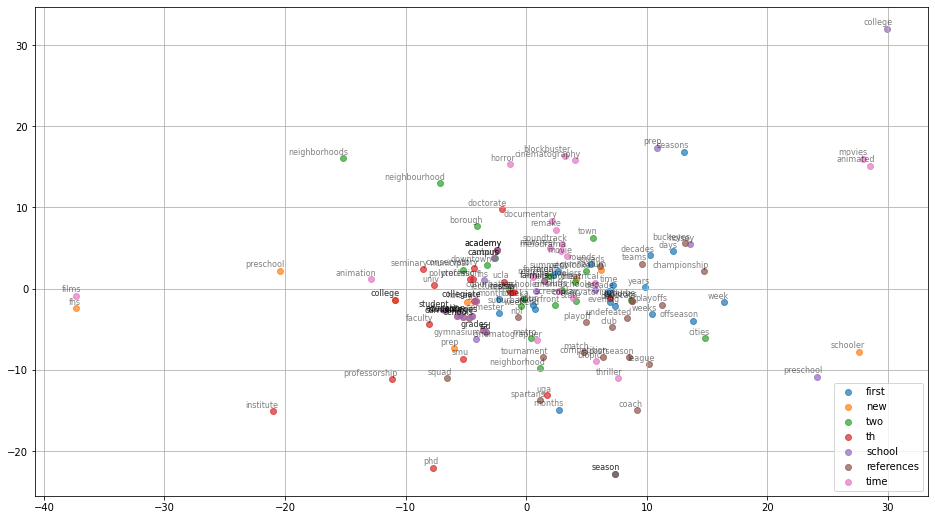

In [189]:
tsne_plot_similar_words(vocab_without_stopwords, embeddings_en_2d, word_clusters)